In [1]:
def hill_diagramatic_method(Q):
    n = Q.nrows()
    if Q.ncols() != n:
        raise ValueError
    z = [0]*n
    for i in range(n):
        a = [ j for j in range(n) ]
        a.remove(i)
        z[i] = Q[a,a].determinant().simplify_full()
    return z

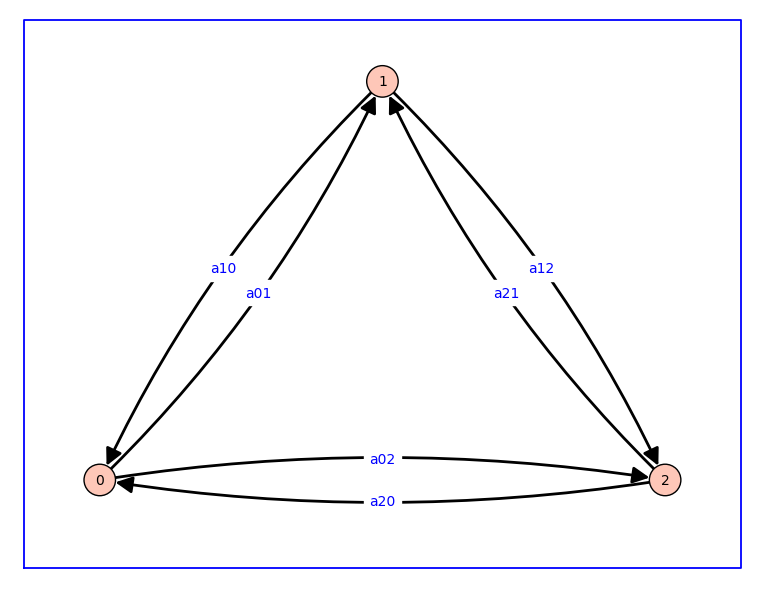

In [2]:
var('p0 p1 p2 a01 a10 a02 a20 a12 a21')
d = {0: {1:a01, 2:a02}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [3]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))
    
A = G.weighted_adjacency_matrix()
Q = generator(A)
show(Q)

[-a01 - a02        a01        a02]
[       a10 -a10 - a12        a12]
[       a20        a21 -a20 - a21]

In [4]:
z = hill_diagramatic_method(Q)
for i in range(3):
    print('z[%s] ='%i, f'{z[i]}')

z[0] = (a10 + a12)*a20 + a10*a21
z[1] = a01*a20 + (a01 + a02)*a21
z[2] = a02*a10 + (a01 + a02)*a12


In [5]:
var('p0 p1 p2 p3 p4 a01 a10 a02 a20 a04 a40 a12 a21 a23 a32 a34 a43')
d = {0: {1:a01, 2:a02, 4:a04}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20, 3:a23}, 3: {2:a32, 4:a34}, 4: {3:a43, 0:a40}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (2,-2), 4: (0,-2)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

A = G.weighted_adjacency_matrix()
Q = generator(A)
show(Q)

z = hill_diagramatic_method(Q)
for i in range(5):
    print('z[%s] ='%i, f'{z[i]}')

[-a01 - a02 - a04              a01              a02                0              a04]
[             a10       -a10 - a12              a12                0                0]
[             a20              a21 -a20 - a21 - a23              a23                0]
[               0                0              a32       -a32 - a34              a34]
[             a40                0                0              a43       -a40 - a43]

z[0] = ((a10 + a12)*a20 + a10*a21)*a32*a43 + (((a10 + a12)*a20 + a10*a21)*a32 + ((a10 + a12)*a20 + a10*a21 + (a10 + a12)*a23)*a34)*a40
z[1] = (a01*a20 + (a01 + a02 + a04)*a21)*a32*a43 + ((a01*a20 + (a01 + a02)*a21)*a32 + (a01*a20 + (a01 + a02)*a21 + a01*a23)*a34)*a40
z[2] = ((a02 + a04)*a10 + (a01 + a02 + a04)*a12)*a32*a43 + ((a02*a10 + (a01 + a02)*a12)*a32 + (a02*a10 + (a01 + a02)*a12)*a34)*a40
z[3] = (a02*a10 + (a01 + a02)*a12)*a23*a40 + (a04*a10*a21 + (a04*a10 + a04*a12)*a20 + ((a02 + a04)*a10 + (a01 + a02 + a04)*a12)*a23)*a43
z[4] = (a04*a10*a21 + (a04*a10 + a04*a12)*a20)*a32 + (a04*a10*a21 + (a04*a10 + a04*a12)*a20 + ((a02 + a04)*a10 + (a01 + a02 + a04)*a12)*a23)*a34
